# **Quora**

# 1. Bussiness Problem

## 1.1 Description:
Quora is a place to gain and share knowledge about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question.

## 1.2 Problem statment:
- Identify given a pair of questions are similar or not.

## 1.3 Real world/Business Objectives and Constraints
1. The cost of a mis-classification can be very high. (specially if pair of questions are different and model predict similar)
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

# 2. Machine Learning Probelm

## 2.1 Mapping the real world problem to an ML problem


###  2.1.1 Type of Machine Leaning Problem
It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.

### 2.1.2 Performance Metric
- log-loss
- Binary Confusion Matrix

# 3. Exploratory Data Analysis 

In [1]:
# import required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 3.1 Load Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# print first 5 rows
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### Observations:
- question1 column contain 1 null value and question2 column conatin 2 null values. We will drop null values.

In [5]:
# drop null values
df.dropna(inplace = True)  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


### Observations:
- Total 404287 data points and 5 attributes.

## 3.2 Distribution of data points among classes

In [7]:
no_dup, dup = df['is_duplicate'].value_counts()
print('Number of different question pairs = ',no_dup)
print('Number of duplicate question pairs = ',dup)

Number of different question pairs =  255024
Number of duplicate question pairs =  149263


Text(0.5, 1.0, 'Duplicate and different questions')

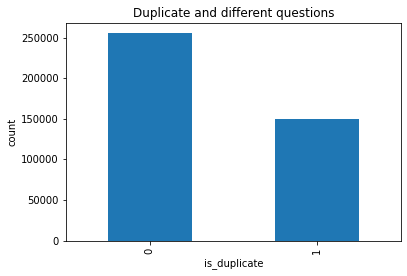

In [8]:
# bar chart for duplicate questions count
df.groupby("is_duplicate")['is_duplicate'].count().plot.bar()
plt.ylabel("count")
plt.title("Duplicate and different questions")

In [9]:
print('Total number of question pairs for training:\n   {}'.format(len(df)))

Total number of question pairs for training:
   404287


In [10]:
print('Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\nQuestion pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

Question pairs are not Similar (is_duplicate = 0):
   63.08%

Question pairs are Similar (is_duplicate = 1):
   36.92%


## 3.3 Number of unique questions

In [11]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537929

Number of unique questions that appear more than one time: 111778 (20.779322178205675%)

Max number of times a single question is repeated: 157



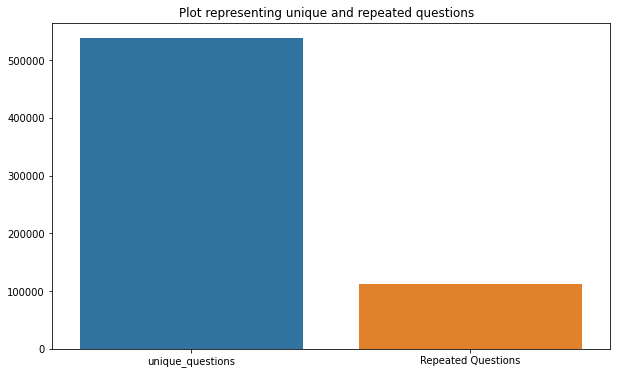

In [12]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [13]:
# creating 2 different dataframes per class for plotting and analysis purpose
df_same = df[df['is_duplicate']== 1]
df_diff = df[df['is_duplicate']== 0]

## 3.4 Check number of different words in question1 and question2

In [15]:
# create new columns for number of words in questions
df_same['q1_words'] = df_same['question1'].str.split().str.len()
df_same['q2_words'] = df_same['question2'].str.split().str.len()
df_diff['q1_words'] = df_diff['question1'].str.split().str.len()
df_diff['q2_words'] = df_diff['question2'].str.split().str.len()

In [16]:
df_same.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,16,16
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9


- q1_words = Total number of words in question1 column.
- q2_words = Total number of words in question2 column.

In [17]:
df_diff.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13


check is there any difference between number of words in question1 and question2 for same / duplicate question pairs:

In [33]:
def mean_abs_diff(df_same, df_diff):
    df_same['words_difference'] = abs(df_same.q1_words - df_same.q2_words)
    df_diff['words_difference'] = abs(df_diff.q1_words - df_diff.q2_words)
    plt.figure(figsize=(10, 6))
    df_diff['words_difference'].plot.line(ylabel = 'Count', xlabel = 'id')
    df_same['words_difference'].plot.line()
    print('Average difference of number of words for same question pairs is', round(df_same['words_difference'].sum() / len(df_same),2))
    print('Average difference of number of words for different question pairs is', round(df_diff['words_difference'].sum() / len(df_diff),2))

Average difference of number of words for same question pairs is 2.42
Average difference of number of words for different question pairs is 4.44


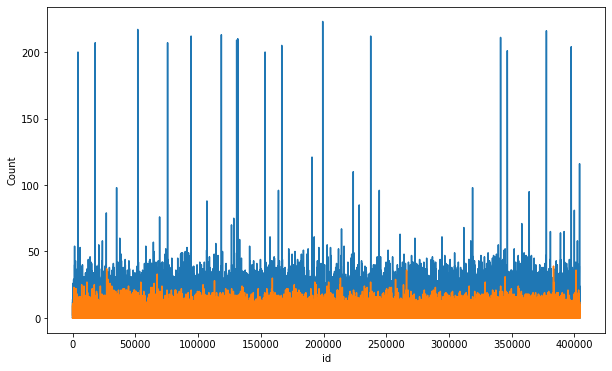

In [34]:
mean_abs_diff(df_same, df_diff)

### Observations:
- Average difference of number of words for same question pairs is 2.42
- Average difference of number of words for different question pairs is 4.44
- In a plot we can clearly see that the difference of number of words for same question paires is less than different question pairs.

## 3.5 Check number of simillar words for both data sets

In [22]:
df_same['simillar_words'] = df_same.apply(lambda x: set(x['question1'].split()) & set(x['question2'].split()),axis=1)

df_same['simillar_words_count'] = df_same['simillar_words'].str.len() 

df_same.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words,words_difference,simillar_words,simillar_words_count
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,16,16,0,"{and, a, me?, Capricorn, does, about, say}",7
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9,2,"{be, geologist?, a, I}",4


In [23]:
df_diff['simillar_words'] = df_diff.apply(lambda x: set(x['question1'].split()) & set(x['question2'].split()),axis=1)

df_diff['simillar_words_count'] = df_diff['simillar_words'].str.len()

df_diff.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words,words_difference,simillar_words,simillar_words_count
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,2,"{What, by, invest, step, guide, to, in, the, i...",10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13,5,"{the, What, (Koh-i-Noor), Kohinoor}",4


In [26]:
# function to calculate average and plot
def simillar_words(df_same,df_diff):
    plt.figure(figsize=(10, 6))
    df_same['simillar_words_count'].plot.line()
    df_diff['simillar_words_count'].plot.line(ylabel = 'Count', xlabel = 'id')
    print("Average simillar words for same question pairs = ",round(sum(df_same['simillar_words_count'])/ len(df_same),2))
    print("Average simillar words for different question pairs = ",round(sum(df_diff['simillar_words_count'])/ len(df_diff),2))

Average simillar words for same question pairs =  5.22
Average simillar words for different question pairs =  3.76


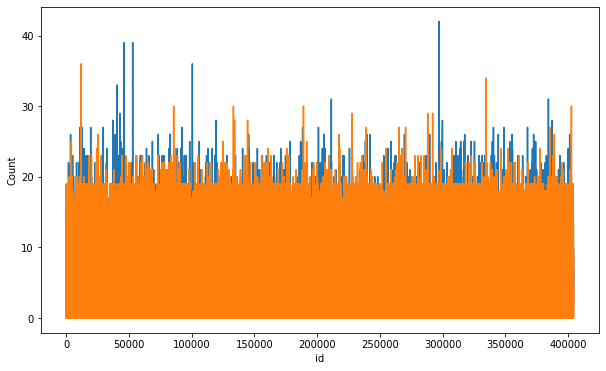

In [27]:
simillar_words(df_same,df_diff)

### Observations:
- Average simillar words for same question pairs =  5.22
- Average simillar words for different question pairs =  3.76
- Average simillar words for same question pairs is more than different question pairs.
- New created features will be helpful to differentiate 2 classes.

## 3.6 Create new basic features:
- **q1len** = length of question1
- **q2len** = length of question2
- **q1_words**             = Total number of words in question1.
- **q2_words**             = Total number of words in question2.
- **total_words**          = Total number of words in question1 and question2.
- **words_difference**     = number of words difference between question1 and question2.
- **simillar_words**       = Similar words between question1 and questin2.
- **simillar_words_count** = Number of similar words between question1 and questin2.
- **word_share**           = ratio of similar_word_count and total_words

In [28]:
def new_features(df):
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1+q2_len'] = df['q1len'] + df['q2len']
    df['q1-q2_len'] = abs(df['q1len'] - df['q2len'])
    df['q1_words'] = df['question1'].str.split().str.len()
    df['q2_words'] = df['question2'].str.split().str.len()
    df['total_words'] = df['q1_words'] + df['q2_words']
    df['words_difference'] = abs(df.q1_words - df.q2_words)
    df['simillar_words'] = df.apply(lambda x: set(x['question1'].split()) & set(x['question2'].split()),axis=1)
    df['simillar_words_count'] = df['simillar_words'].str.len()
    df['word_share'] = df['simillar_words_count'] / df['total_words']
    return df
new_features(df)    

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1+q2_len,q1-q2_len,q1_words,q2_words,total_words,words_difference,simillar_words,simillar_words_count,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,123,9,14,12,26,2,"{What, by, invest, step, guide, to, in, the, i...",10,0.384615
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,139,37,8,13,21,5,"{the, What, (Koh-i-Noor), Kohinoor}",4,0.190476
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,132,14,14,10,24,4,"{speed, can, How}",3,0.125000
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,115,15,11,9,20,2,{},0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,115,37,13,7,20,6,"{in, Which}",2,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85,79,164,6,14,13,27,1,"{in, many, How, are, latest, the, there, versi...",9,0.333333
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,41,42,83,1,8,9,17,1,"{life, is, there, after, death?}",5,0.294118
404287,404287,537928,537929,What is one coin?,What's this coin?,0,17,17,34,0,4,3,7,1,{coin?},1,0.142857
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94,127,221,33,17,25,42,8,{of},1,0.023810


In [29]:
# function to check the first word is same for both questions or not.
def first_word_same(question1, question2):
    first_words_1 = question1.apply(lambda x: x.split()[0].lower())
    first_words_2 = question2.apply(lambda x: x.split()[0].lower())
    lst = []
    for q1,q2 in zip(first_words_1,first_words_2):
        if q1==q2:
            q1 = 1
        else:
            q1 = 0
        lst.append(q1)
    return lst
df['first_word_same'] = first_word_same(df['question1'],df['question2'])  

In [30]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1+q2_len,q1-q2_len,q1_words,q2_words,total_words,words_difference,simillar_words,simillar_words_count,word_share,first_word_same
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,123,9,14,12,26,2,"{What, by, invest, step, guide, to, in, the, i...",10,0.384615,1
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,139,37,8,13,21,5,"{the, What, (Koh-i-Noor), Kohinoor}",4,0.190476,1
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,132,14,14,10,24,4,"{speed, can, How}",3,0.125000,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,115,15,11,9,20,2,{},0,0.000000,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,115,37,13,7,20,6,"{in, Which}",2,0.100000,1


### 3.6.1 Analysis of new created features

In [31]:
print ("Minimum length of the questions in question1 : " , min(df['q1_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 69
Number of Questions with minimum length [question2] : 25


### 3.6.2 Analysis of feature: word_share

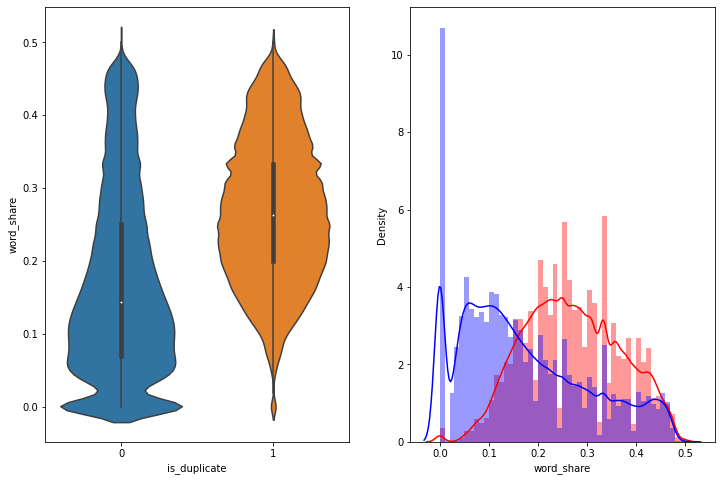

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

### 3.6.3 Aanalysis of feature: simillar_words_count

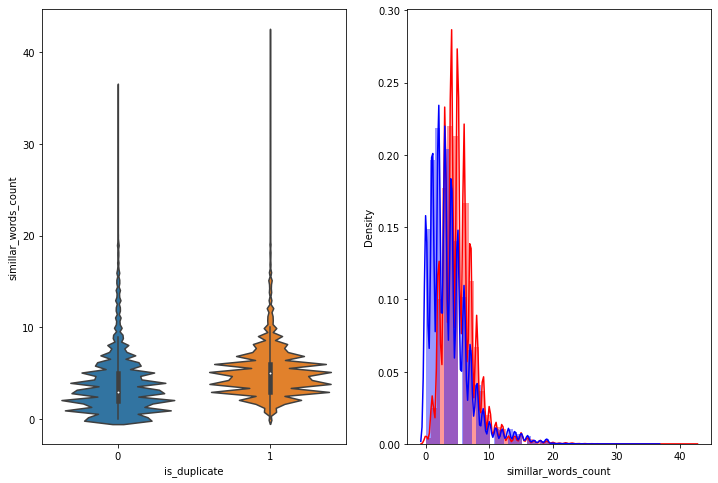

In [32]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'simillar_words_count', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['simillar_words_count'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['simillar_words_count'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions of the word_Common feature in similar and non-similar questions are highly overlapping

with only above features it is difficult to distinguish classes.


## Save new created features

In [61]:
df1 = df.drop(['qid1','qid2','question1','question2'],axis=1)

In [67]:
# storing the basic features to csv file
df1.to_csv("basic features.csv", index = False)